# Baseline Modeling(LR), Advanced Modeling(RFR), HyperParameter Tuning And Evaluation

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [5]:
df= pd.read_csv('Cleaned_engineered_data_IMDB.csv')

In [6]:
df.head()

,Unnamed: 0,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Movie_Age,Genre_Action,Genre_Adventure,...,Certificate_Unrated,Director_Alfred Hitchcock,Director_Hayao Miyazaki,Director_Martin Scorsese,Director_Other,Director_Steven Spielberg,Star1_Clint Eastwood,Star1_Other,Star1_Robert De Niro,Star1_Tom Hanks
0,0,1994,142,9.3,80.0,2343110,28341469.0,31,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,1972,175,9.2,100.0,1620367,134966411.0,53,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2,2008,152,9.0,84.0,2303232,534858444.0,17,1,0,...,0,0,0,0,1,0,0,1,0,0
3,3,1974,202,9.0,90.0,1129952,57300000.0,51,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,1957,96,9.0,96.0,689845,4360000.0,68,0,0,...,0,0,0,0,1,0,0,1,0,0


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head(3)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Movie_Age,Genre_Action,Genre_Adventure,Genre_Animation,...,Certificate_Unrated,Director_Alfred Hitchcock,Director_Hayao Miyazaki,Director_Martin Scorsese,Director_Other,Director_Steven Spielberg,Star1_Clint Eastwood,Star1_Other,Star1_Robert De Niro,Star1_Tom Hanks
0,1994,142,9.3,80.0,2343110,28341469.0,31,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1972,175,9.2,100.0,1620367,134966411.0,53,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2008,152,9.0,84.0,2303232,534858444.0,17,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [9]:
target= 'IMDB_Rating'
x= df.drop(columns=[target])
y= df[target]
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(799, 41)
(200, 41)


In [10]:
lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred_lin= lr.predict(x_test)

# Evaluate Linear Regression RMSE AND R^2

In [11]:
rmse_lin= np.sqrt(mean_squared_error(y_pred_lin,y_test))
r_score= r2_score(y_pred_lin,y_test)

In [12]:
print(round(rmse_lin,2),round(r_score,2),sep=" ")

0.21 -0.65


## Plot Actual vs. Predicted for Linear Regression


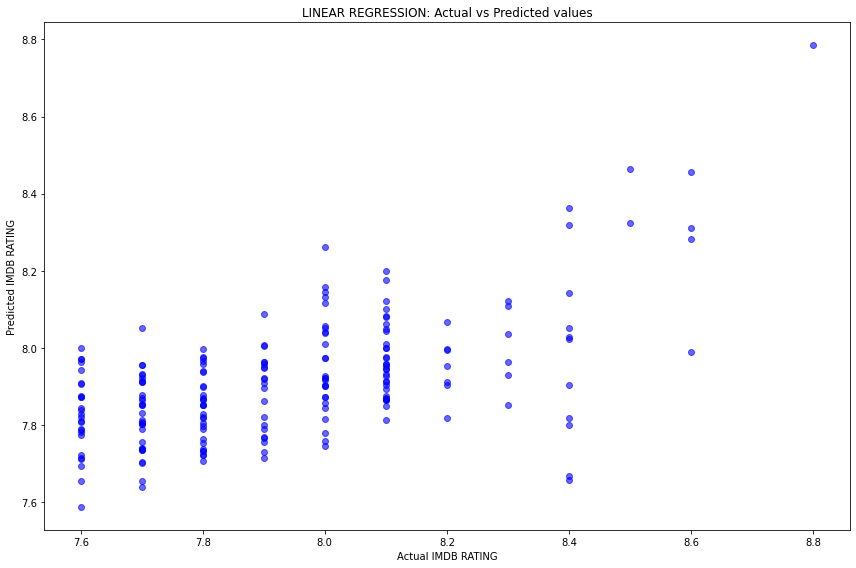

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_lin,color='blue',alpha=0.6)
plt.title('LINEAR REGRESSION: Actual vs Predicted values')
plt.xlabel('Actual IMDB RATING')
plt.ylabel('Predicted IMDB RATING')
plt.tight_layout()
plt.savefig('Preicted vs actual linear regression')
plt.show()

.## Overall, the conclusion is that the linear regression model, although showing a positive trend, is not fit enough to accurately predict IMDb ratings, as evidenced by the spread of the scatter and the performance metrics. This supports the move towards using more advanced modeling techniques to improve prediction accuracy.


# Advance model: Random Forest Regression

In [15]:
rf= RandomForestRegressor()

In [16]:
rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)

# Evaluate the random forest performance

In [17]:
print(f"RMSE of rf Model: {np.sqrt(mean_squared_error(y_test,y_pred_rf))}")

RMSE of rf Model: 0.17727890455437711


In [18]:
print(f"r2_score of rf Model: {(r2_score(y_test,y_pred_rf))}")

r2_score of rf Model: 0.520002901870944


# Feature importances using random forest 

In [19]:
importances= rf.feature_importances_

In [20]:
indices= np.argsort(importances)[::-1]

In [21]:
feature_names= x_train.columns

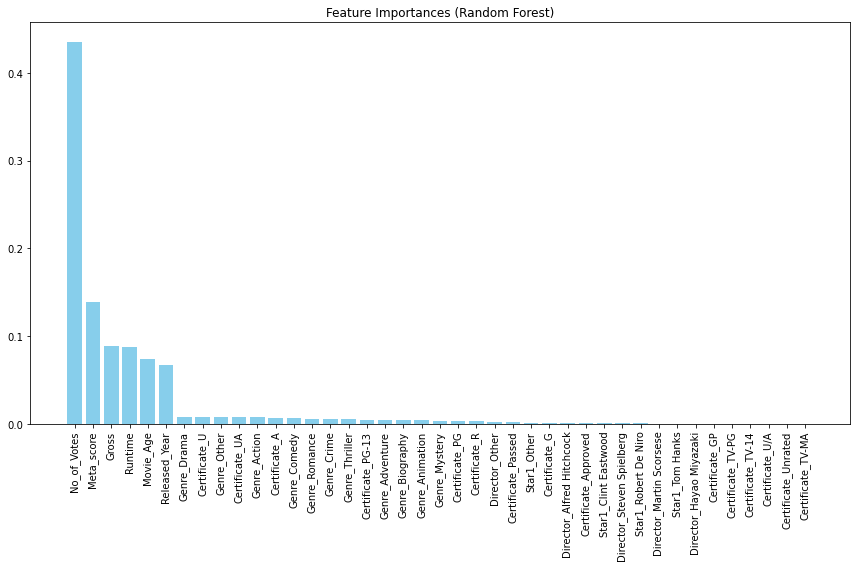

In [23]:
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align='center', color='skyblue')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.savefig('Feature_importance_rf')
plt.show()

# Hyperparameter Tuning with GridSearchCV
# Tuning Random Forest parameters


In [24]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best parameters from GridSearchCV:", grid_search.best_params_)


Best parameters from GridSearchCV: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


# Evaluate the tuned model on test set

In [25]:

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print("Tuned Random Forest RMSE:", rmse_best_rf)
print("Tuned Random Forest R²:", r2_best_rf)


Tuned Random Forest RMSE: 0.17554151332956397
Tuned Random Forest R²: 0.5293650568608862


## Here with this model, we improved our prediction metrics a lot better than a linear regression model. 

#

#

# Visualization, Interpretation and Evaluation

## Residual Analysis

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [27]:
y_pred=best_rf.predict(x_test)
residuals= y_test.values-y_pred

# Residuals vs Preidcted Values

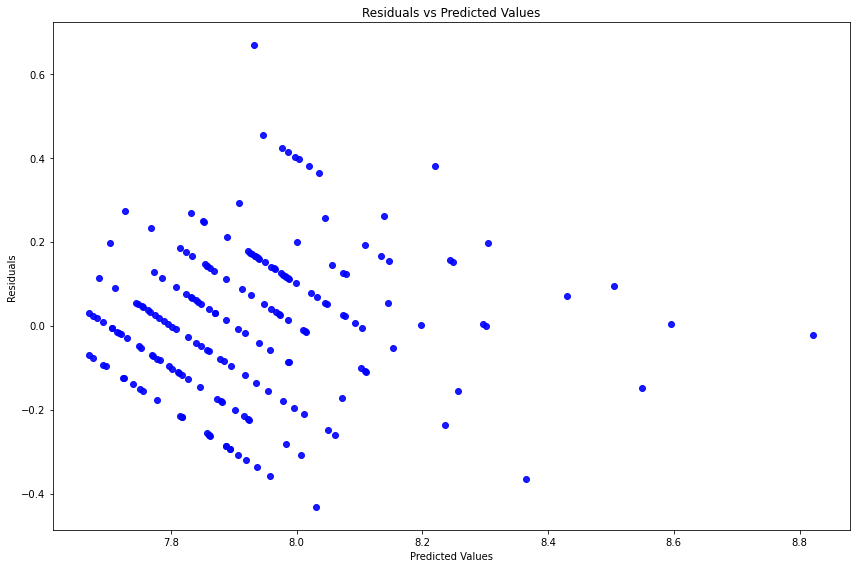

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_pred,y=residuals,alpha=0.9, color='blue')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.savefig('Residuals_VS_Predicted.png')
plt.show()


##  The residuals appear to be generally scattered around the horizontal line at zero (randomly), which is a positive sign. It suggests that, on average, the model does not systematically overpredict or underpredict IMDb ratings.

# Distribution of residuals

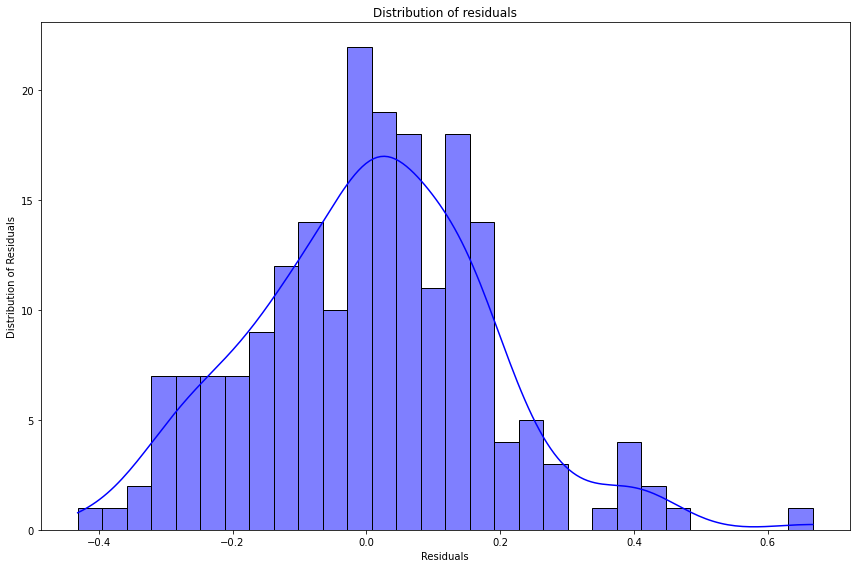

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title('Distribution of residuals')
plt.xlabel('Residuals')
plt.ylabel('Distribution of Residuals')
plt.tight_layout()
plt.savefig('Distribution_of_Residuals.png')
plt.show()

## Most residuals centered around zero which suggests that model doesn't have systematic Bias. Overall shape of the distribution looks bell-shaped which illustrate that residuals have normal distributions.

# Generate a QQ-Plot to assess normality of residuals


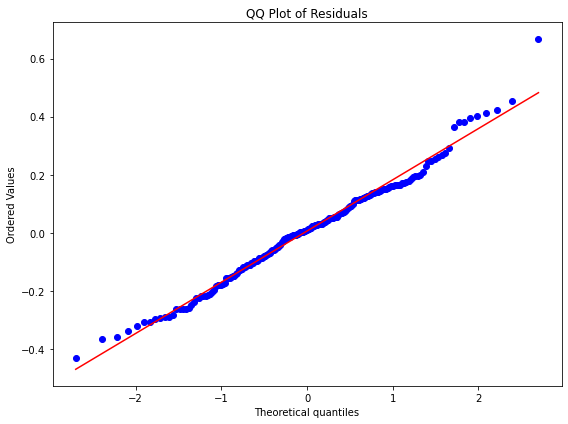

In [30]:
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.savefig('QQ_Plot_of_Residuals.png')
plt.tight_layout()
plt.show()


## Majority of points align well with the line, the residuals are largely normal. This supports the assumption of normality in the errors for the model.

# 

## Cross-Validation Evaluation


In [38]:
from sklearn.model_selection import cross_val_score


cv_rmse = -cross_val_score(best_rf, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_r2 = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='r2')

print("Cross-Validated RMSE: {:.3f} ± {:.3f}".format(np.mean(cv_rmse), np.std(cv_rmse)))
print("Cross-Validated R²: {:.3f} ± {:.3f}".format(np.mean(cv_r2), np.std(cv_r2)))


Cross-Validated RMSE: 0.194 ± 0.005
Cross-Validated R²: 0.500 ± 0.065


##  These cross-validated metrics confirm that the tuned Random Forest is a solid and stable model for predicting IMDb ratings.

# 

In [39]:
!pip install shap

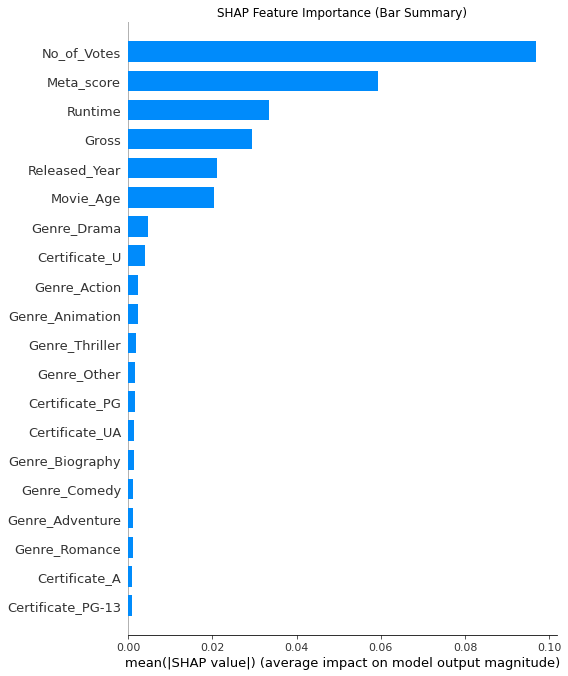

In [33]:
import shap
explainer = shap.TreeExplainer(best_rf)

shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar Summary)")
plt.tight_layout()
plt.savefig('BarSummary_featureImportance.png')
plt.show()

##

# Partial Dependence Plots (PDP)

Top Feature for PDP: No_of_Votes


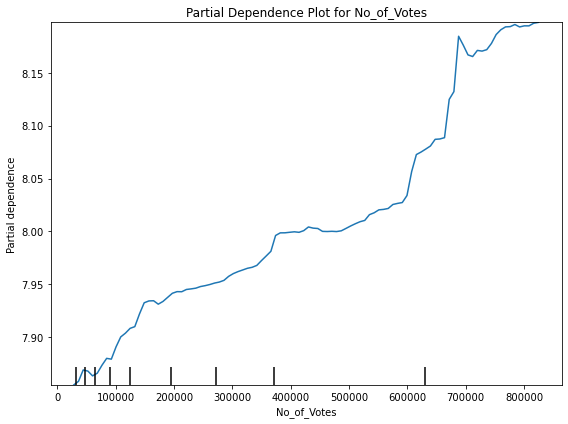

In [34]:
from sklearn.inspection import PartialDependenceDisplay
top_feature = feature_names[indices[0]]
print("Top Feature for PDP:", top_feature)
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(best_rf, x_test, [top_feature], ax=ax)
plt.title("Partial Dependence Plot for " + top_feature)
plt.savefig('PDP_for_TopFeature.png')
plt.tight_layout()
plt.show()


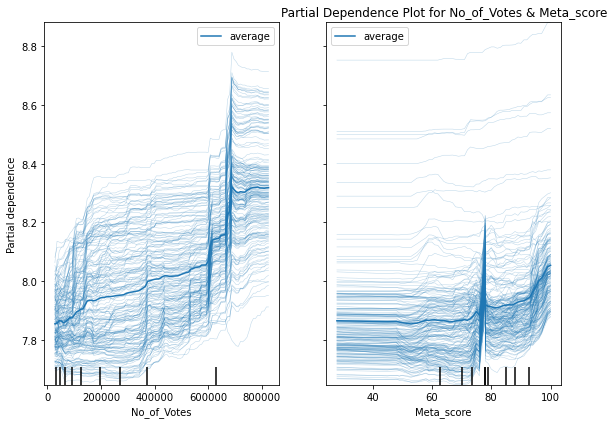

In [35]:
if len(indices) > 1:
    top_two_features = [feature_names[indices[0]], feature_names[indices[1]]]
    fig, ax = plt.subplots(figsize=(8, 6))
    PartialDependenceDisplay.from_estimator(best_rf, x_test, top_two_features, kind='both', ax=ax)
    plt.title("Partial Dependence Plot for " + " & ".join(top_two_features))
    plt.tight_layout()
    plt.savefig('2wayPDP_for_top2features.png')
    plt.show()
